## Analysis Statement
> **Can we use machine learning to help PC buyers to check if it is a good or bad deal? Suggest laptop price based on its specifications data?**

### Problem Statement

This study aims to investigate the relationship between laptop specifications and their market prices to determine whether a given PC offers good value for its configuration. By analyzing a diverse dataset of laptops from various brands, including Apple, Dell, and others, we seek to identify the key features—such as processor type, RAM size, storage capacity, and brand—that significantly influence pricing. Through data preprocessing, categorical variable encoding, pipeline transformations, and hyperparameter tuning, we will develop regression models capable of predicting laptop prices. The goal is to assess whether a particular laptop is a worthwhile purchase relative to its specifications, ultimately aiding consumers in making more informed purchasing decisions and uncovering patterns that explain pricing disparities across brands and models.

# Flow of analysis

1. Features extraction + preprocessing because data currently is all in categorical formate features could be extracted.
2. Exploratory Data Analysis to check for patterns and internal correlation
3. Feature selection
4. Features encoding
5. Evaluation of moduel
6. HyperpaRameter tunning
7. Evaluation of final model

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn import datasets
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("laptop_price.csv", encoding="ISO-8859-1")

data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# 1. Data Preprocessing and features extraction

In [3]:
bool_series = data.duplicated(keep=False)
data[~bool_series]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## 1.1. Extract information from "ScreenResolution" Column
- X and y dimensions of display
- Whether it is IPS or Touchscreen, as laptops that have these features will generally cost more


In [4]:
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: x.split()[-1].split("x")[0])
data['Y_res'] = data['ScreenResolution'].apply(lambda x: x.split()[-1].split("x")[1])
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

## 1.2. Convert "Ram" and "Weight" into type int and float

In [5]:
data['Ram'] = data['Ram'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

## 1.3. Extract information from "Cpu" and "Gpu"

Importance of Extracting CPU and GPU Information

Laptop performance and pricing are heavily influenced by the CPU (processor) and GPU (graphics card). These features are often encoded in a single string (e.g., "Intel Core i5 7200U 2.5GHz"), but extracting specific components gives us structured, informative features.

- Improves interpretability: Helps you and your model understand which hardware factors influence price.

- Enables feature engineering: You can group CPUs/GPUs into performance tiers, detect high-end components, etc.

- Reduces noise: Raw strings can be inconsistent; extracting structured features reduces variability.

- Boosts model performance: More meaningful, cleaner data leads to better learning and generalization.

In [6]:
data['Cpu_Company'] = data['Cpu'].apply(lambda x: x.split()[0])
data['Cpu models'] = data['Cpu'].apply(lambda x: x.split()[1])
data['Cpu frequency'] = data['Cpu'].apply(lambda x: float(x.split(" ")[-1].replace("GHz", "")))

In [7]:
data['Gpu_Company'] = data['Gpu'].apply(lambda x: x.split()[0])
data['Gpu_model'] = data['Gpu'].apply(lambda x: x.split()[1])

## 1.4. Extract information from "Memory"

When predicting the price of a laptop, it is not sufficient to consider only the storage size (e.g., 256GB, 1TB). The type of storage—represented by the Memory feature—has a significant impact on price, even when the storage capacities are identical.

Based on the dataset and the attached image, we observe a clear price difference between storage types:

- SSD (Solid State Drive) laptops are significantly more expensive than those with traditional HDD (Hard Disk Drives).

- Flash Storage (commonly used in lightweight or budget laptops) tends to be cheaper than SSDs but more expensive than HDDs, especially for small capacities.

- Hybrid Drives combine SSD and HDD, offering a balance in performance and cost, and fall somewhere in between.

- Therefore, we must extract and use both the storage size and type for accurate modeling.

In [8]:
# HDD
data['HDD']=data['Memory'].str.extract('(\d\d\d?GB\sHDD|\dTB\sHDD|\d\.0TB\sHDD)',expand=True)
data['HDD']=data['HDD'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)
data['HDD']=data['HDD'].str.replace('(TB|\.0TB)','000',regex=True)
data['HDD'].fillna(0,inplace=True)

In [9]:
# SSD
data['SSD']=data['Memory'].str.extract('(\d\d?\d?GB\sSSD|\dTB\sSSD|\d\.0TB\sSSD)',expand=True)
data['SSD']=data['SSD'].str.extract('(\dTB|\d\d?\d?|\d\.0TB)',expand=True)

data['SSD']=data['SSD'].str.replace('(TB|\.0TB)','000',regex=True)
data['SSD'].fillna(0,inplace=True)

In [10]:
#SSHD

data['SSHD']=data['Memory'].str.extract('(\d\d\dGB\sHybrid|\d\.0TB\sHybrid)',expand=True)
data['SSHD']=data['SSHD'].str.extract('(\d\d\d?|\d\.0TB)',expand=True)
data.loc[data['Memory'].str.contains('(\d\d\dGB\sHybrid|\d\.0TB\sHybrid)',regex=True)]
data['SSHD']=data['SSHD'].str.replace('(TB|\.0TB)','000',regex=True)
data['SSHD'].fillna(0,inplace=True)

#Flash Storage
data['FStorage']=data['Memory'].str.extract('(\d\d\d?GB\sFlash)',expand=True)
data['FStorage']=data['FStorage'].str.extract('(\d\d\d?)',expand=True)
data['FStorage'].fillna(0,inplace=True)

In [11]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Touchscreen,Cpu_Company,Cpu models,Cpu frequency,Gpu_Company,Gpu_model,HDD,SSD,SSHD,FStorage
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,0,Intel,Core,2.3,Intel,Iris,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,0,Intel,Core,1.8,Intel,HD,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,0,Intel,Core,2.5,Intel,HD,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,0,Intel,Core,2.7,AMD,Radeon,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,0,Intel,Core,3.1,Intel,Iris,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,...,1,Intel,Core,2.5,Intel,HD,0,128,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,...,1,Intel,Core,2.5,Intel,HD,0,512,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,...,0,Intel,Celeron,1.6,Intel,HD,0,0,0,64
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,...,0,Intel,Core,2.5,AMD,Radeon,1000,0,0,0


In [12]:
data['Price_SGD'] =  data['Price_euros']*1.48
data['Price_SGD'] = data['Price_SGD'].map(lambda x: format(x, '.2f'))
data['Price_SGD'] =  data['Price_SGD'].astype('float32')

# 2. Exploratory Analysis

*This part of the code only be used for generating correlation matrices, as we mainly use **Tableau** to do EDA*
Link to Tableau profile: https://public.tableau.com/views/IE0005LaptopPriceEDA/Dashboard2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## 2.1. Correlation Matrix


- Linear correlation matrix

<Axes: >

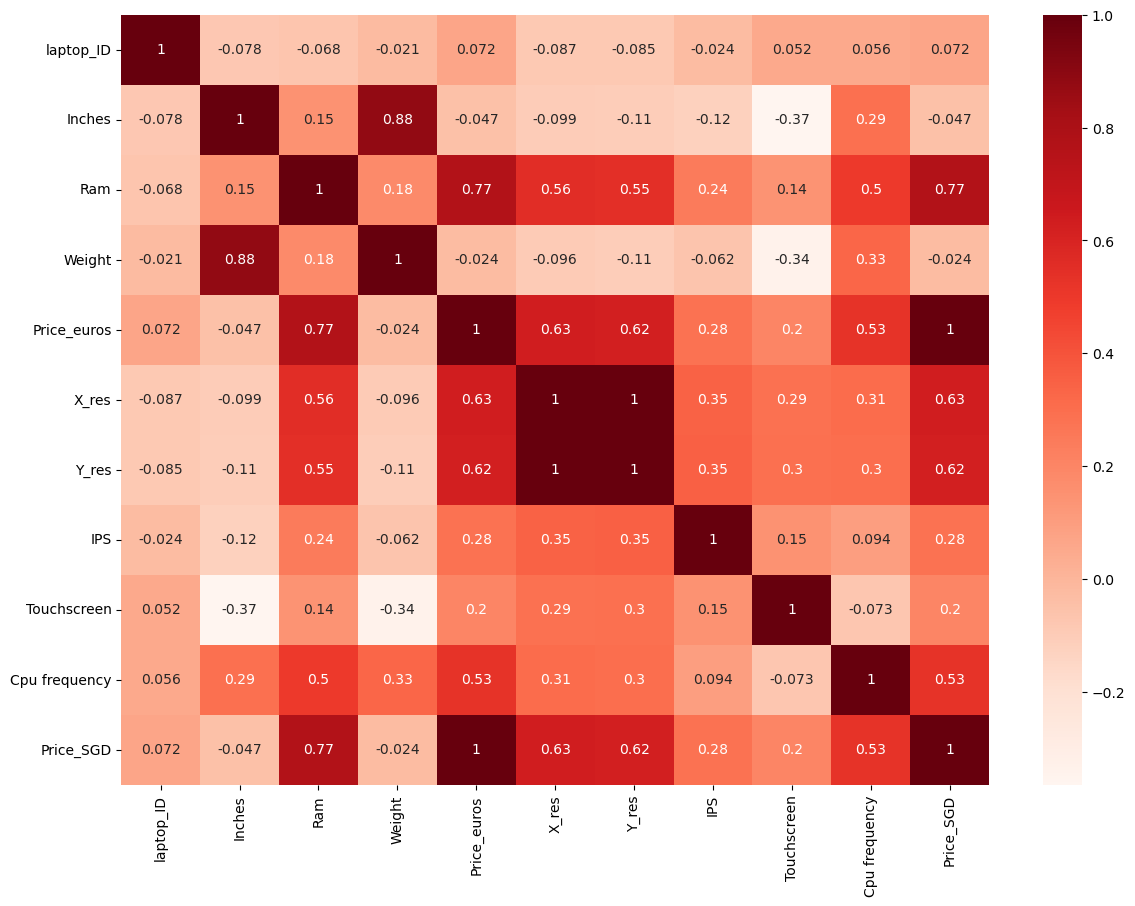

In [13]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(method='spearman'),cmap='Reds', annot=True)

- Non-linear correlation matrix using phik

In [14]:
!pip install phik

In [15]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [16]:
#Set up dataframe for phik
phik_overview = numeric_data.phik_matrix()

interval columns not set, guessing: ['laptop_ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'X_res', 'Y_res', 'IPS', 'Touchscreen', 'Cpu frequency', 'Price_SGD']


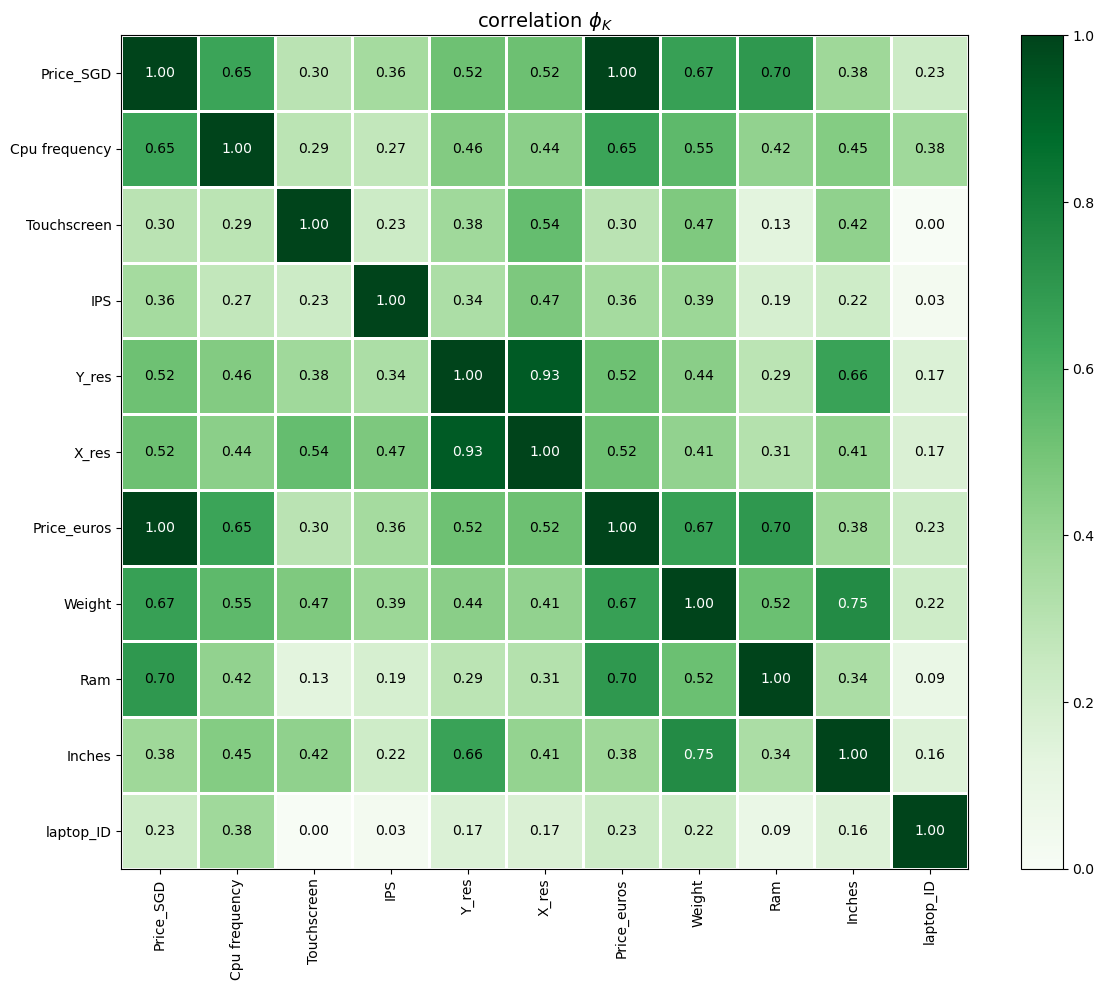

In [17]:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1,
                        figsize=(12,10))
plt.tight_layout()

# 3. Model Development


### Evaluation Metrics

Since the model is intended for predicting values related to personal computers (PCs)—typically used by everyday consumers—the need for a **professional-grade prediction** with high tolerance for outliers is minimal. For this reason, I have selected **Mean Absolute Error (MAE)** as my primary evaluation metric, alongside **Mean Squared Error (MSE)** and the **Coefficient of Determination ($R^2$)** for additional insights.

---

### Mean Absolute Error (MAE)

Mean Absolute Error is defined as:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

Where:
- $y_i$ is the actual value  
- $\hat{y}_i$ is the predicted value  
- $n$ is the total number of data points

**Why MAE?**
- MAE is easily interpretable as the **average error** of the model  
- It does not square the errors, making it **less sensitive to outliers**  
- It reflects how the model performs on **typical laptop-related predictions**

---

### Mean Squared Error (MSE)

MSE is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

- MSE gives **greater weight to larger errors**, making it useful for identifying when large deviations occur  
- It's often used when **penalizing large errors** is important

---

### Coefficient of Determination ($R^2$)

The $R^2$ score is defined as:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:
- $\bar{y}$ is the mean of the actual values

- $R^2$ represents the **proportion of the variance** in the dependent variable that is predictable from the independent variables  
- A higher $R^2$ score (closer to 1) indicates a **better fit**

## 3.1. Regression using extracted information from Cpu and Gpu

In [18]:
columns_drop = ["Memory","ScreenResolution","Cpu","Gpu"]
data_drop = data.drop(columns_drop,axis = 1)
display(data_drop)

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,X_res,...,Cpu_Company,Cpu models,Cpu frequency,Gpu_Company,Gpu_model,HDD,SSD,SSHD,FStorage,Price_SGD
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,2560,...,Intel,Core,2.3,Intel,Iris,0,128,0,0,1982.739990
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,1440,...,Intel,Core,1.8,Intel,HD,0,0,0,128,1330.430054
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,1920,...,Intel,Core,2.5,Intel,HD,0,256,0,0,851.000000
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,2880,...,Intel,Core,2.7,AMD,Radeon,0,512,0,0,3755.429932
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,2560,...,Intel,Core,3.1,Intel,Iris,0,256,0,0,2669.330078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,1920,...,Intel,Core,2.5,Intel,HD,0,128,0,0,944.239990
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,3200,...,Intel,Core,2.5,Intel,HD,0,512,0,0,2218.520020
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,1366,...,Intel,Celeron,1.6,Intel,HD,0,0,0,64,338.920013
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,1366,...,Intel,Core,2.5,AMD,Radeon,1000,0,0,0,1130.719971


In [19]:
X,y = data_drop.drop(['Price_SGD', 'Price_euros'],axis = 1),data['Price_SGD']
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

The data is first split into two parts:
Categorical Features (onehot_features): like OpSys, Company, Cpu_Company, etc.
Numerical Features (scaling_features): like Inches, Weight, Ram, etc.]

Numerical Pipeline:
- StandardScaler: transforms values so they have mean = 0 and standard deviation = 1
    - Helps models treat all numerical features equally, especially useful for models that are sensitive to scale (like linear models, SVMs)

Categorical Pipeline:
- OneHotEncoder: turns text categories into binary columns (e.g., OpSys_Windows, OpSys_Mac) handle_unknown='ignore': avoids errors during prediction if new categories appear


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler,LabelBinarizer,PowerTransformer,OneHotEncoder

onehot_features = ["OpSys","Company","Product","TypeName","Cpu_Company","Cpu models","Gpu_Company","Gpu_model"]
scaling_features = ["Inches","Weight","X_res","Cpu frequency","Y_res","HDD","SSD","SSHD","FStorage","Ram"]

num_features_pipe = Pipeline([
    ("scaler", StandardScaler())
])

cat_features_pipe = Pipeline([
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])



drop_Cpu_Gpu_pipe = ColumnTransformer([
    ("cat", cat_features_pipe, onehot_features),
    ("num", num_features_pipe, scaling_features)

],remainder = 'passthrough')

In [21]:
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from xgboost import XGBRegressor

### **Key Features of `models_selection`**

---

#### 1. **Multiple Model Support**
- Accepts a list of regression models and **automatically trains, evaluates, and compares** each one.
- Dynamically handles models that do or don’t support the `learning_rate` parameter.
- Enables fast benchmarking across different model types (linear, tree-based, boosting, etc.).

---

#### 2. **Target Transformation**
- Wraps the regression pipeline using **`TransformedTargetRegressor`** to apply a **log transformation** to the target variable (`y_train`).
- Stabilizes variance in skewed data (like prices) to improve prediction accuracy.
- Applies **`np.exp()`** during prediction to return predictions on the original price scale.

---

#### 3. **Pipeline Integration**
- Uses a **`Pipeline`** to combine preprocessing (`prep_pipe`) with model training.
- Ensures that transformations like **scaling, encoding, and imputing** happen consistently.
- Prevents **data leakage**, especially during cross-validation.

---

#### 4. **Training + 10-Fold Cross-Validation**
- Evaluates performance using both the **training data** and **cross-validated scores**.
- Calculates key regression metrics:
  - **RMSE** (Root Mean Squared Error)
  - **MAE** (Mean Absolute Error)
  - **R² Score** (Goodness of fit)
- Provides insight into **model stability, generalization**, and potential **overfitting/underfitting**.

---

#### 5. **Auto-Model Management**
- Automatically handles model instantiation and fitting, reducing manual setup.
- Provides a fallback mechanism in case `Pipeline` creation fails.
- Keeps code **clean, DRY**, and easy to scale for experimentation.

---

#### 6. **Saved Model Access**
- Can optionally return a dictionary of **fitted models** for later evaluation on test data.
- Useful for **final deployment**, further analysis, or prediction without retraining.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from tqdm import tqdm

def models_selection(clfs:list, X_train, y_train, prep_pipe, table_name="Model Score",
                     scoring=[mean_squared_error, mean_absolute_error, r2_score],
                     columns=["rmse", "mae", "r2"], trainvstest=True,
                     graph=False, rmse=True, return_table=False, learning_rate=0.1):

    hist = {}
    saved_models = {}  # NEW: to store trained models

    for model in tqdm(clfs):
        try:
            model_instance = model(learning_rate=learning_rate) if 'learning_rate' in model().get_params() else model()

            ok = Pipeline([
                ("preprocess", prep_pipe),
                ("model", model_instance)
            ])
            clf = TransformedTargetRegressor(regressor=ok, func=np.log, inverse_func=np.exp)
        except:
            model_instance = model(learning_rate=learning_rate) if 'learning_rate' in model().get_params() else model()
            clf = TransformedTargetRegressor(regressor=model_instance, func=np.log, inverse_func=np.exp)

        clf.fit(X_train, y_train)
        saved_models[model.__name__] = clf  # NEW: save the fitted model

        yhat_train = clf.predict(X_train)
        mse_train = mean_squared_error(y_train, yhat_train)
        mae_train = mean_absolute_error(y_train, yhat_train)
        r2_score_train = r2_score(y_train, yhat_train)

        # 10-Fold Cross Validation
        cv_hist = cross_validate(clf, X_train, y_train, scoring=["neg_mean_squared_error", "neg_mean_absolute_error", "r2"], cv=10, n_jobs=-1)
        hist[model.__name__] = dict(
            train_rmse=np.sqrt(mse_train),
            cv_rmse=np.sqrt(abs(cv_hist['test_neg_mean_squared_error'].mean())),
            train_mae=mae_train,
            cv_mae=abs(cv_hist['test_neg_mean_absolute_error'].mean()),
            train_r2=r2_score_train,
            cv_r2=cv_hist['test_r2'].mean(),
        )

    df = pd.DataFrame(hist).T
    df.style.set_table_attributes("style='display:inline'").set_caption(table_name)
    display(df)

    if return_table:
        return df, saved_models  # NEW: return models too
    else:
        return saved_models


In [25]:
# Get both evaluation table and trained models

models = [ Lasso, Ridge, #linear_model
    KNeighborsRegressor, #distance_based_model
    RandomForestRegressor, #ensemble tree models
    GradientBoostingRegressor,
    XGBRegressor
]

df_scores, trained_models = models_selection(
    clfs=models,
    X_train=X_train,
    y_train=y_train,
    prep_pipe=drop_Cpu_Gpu_pipe,
    table_name="Model Scores",
    return_table=True
)

  0%|                                                     | 0/6 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functi

,train_rmse,cv_rmse,train_mae,cv_mae,train_r2,cv_r2
Lasso,1064.247271,1066.507386,780.400333,782.017727,-0.070128,-0.084160
Ridge,321.367891,530.134933,184.926869,286.545604,0.902421,0.742528
KNeighborsRegressor,833.591919,1015.245583,594.663269,754.798431,0.343465,0.007337
RandomForestRegressor,168.444036,431.881095,98.884322,268.828754,0.973192,0.822988
GradientBoostingRegressor,319.938864,408.939069,221.945126,268.151451,0.903287,0.839793
XGBRegressor,198.187851,407.607129,133.337570,257.359335,0.962889,0.840040


### **Top Performing Models**

**XGBRegressor**
- **Best overall performance**
- Lowest cross-validation RMSE (`cv_rmse = 407.6`)
- Highest R² (`cv_r2 = 0.84`)
- ✅ Great generalization, handles non-linear patterns and interactions well  
- ✅ Excellent balance of bias and variance

**RandomForestRegressor**
- **cv_rmse = 425.12**, **cv_r2 = 0.828**
- ✅ Very strong performance, slightly behind XGB
- ✅ Ensemble method that reduces overfitting, good for tabular data


**GradientBoostingRegressor**
- **cv_rmse = 408.88**, **cv_r2 = 0.8390**
- ✅ Another boosting model with good accuracy
- Slightly higher error than XGB, but still very reliable

### **Moderate Performer**

**Ridge Regression**
- ✅ Performs decently due to L2 regularization
- 🔸 Linear model — lacks ability to capture complex relationships

### **Underperformers**

**KNeighborsRegressor**
- ❌ Poor generalization in high-dimensional space
- Struggles with noisy or unscaled data

**Lasso Regression**
- ❌ Worst performance
- Too aggressive with feature elimination, underfits the data

Hence we would be using the top 3 models to do hypertunning instead and not lasso even tho its a good model but its a linear model so it might not be the best for this dataset

## 3.2. Regression using information from Gpu and Cpu by directly enconding these columns

In [28]:
from sklearn.preprocessing import LabelBinarizer

class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly,self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [29]:
# New pipeline for binary encoding

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler,LabelBinarizer,PowerTransformer,OneHotEncoder

onehot_features = ["OpSys","Company","TypeName","Product"]
hashing_features = ["Cpu","Gpu"]
scaling_features = ["Inches","Weight","X_res","Y_res","HDD","SSD","SSHD","FStorage","Ram"]

num_features_pipe = Pipeline([
    ("scaler", StandardScaler())
])


cat_features_pipe = Pipeline([
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


hasing_features_pipe = Pipeline([
    ("binary_encoding",(LabelBinarizerPipelineFriendly()))
])


hash_Cpu_Gpu_pipe = ColumnTransformer([
    ("binaryencodingCpu",hasing_features_pipe,'Cpu'),
    ("binaryencodingGpu",hasing_features_pipe,"Gpu"),
    ("cat", cat_features_pipe, onehot_features),
    ("num", num_features_pipe, scaling_features)

],remainder = 'passthrough')

In [30]:
drop_columns = ['Cpu_Company','Cpu models','Cpu frequency','Gpu_Company','Gpu_model','ScreenResolution',"Memory"]
data_drop = data.drop(drop_columns,axis = 1)

In [31]:
X,y = data_drop.drop(["Price_euros", 'Price_SGD'],axis = 1),data_drop['Price_SGD']
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

In [32]:
models = [ Lasso, Ridge, #linear_model
    KNeighborsRegressor, #distance_based_model
    RandomForestRegressor, #ensemble tree models
    GradientBoostingRegressor,
    XGBRegressor
]
models_selection(models,X_train, y_train,table_name = "Regression with Cpu and Gpu",prep_pipe=hash_Cpu_Gpu_pipe )

  0%|                                                     | 0/6 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:217: UserWarning: The provided functi

,train_rmse,cv_rmse,train_mae,cv_mae,train_r2,cv_r2
Lasso,1064.247271,1066.507386,780.400333,782.017727,-0.070128,-0.084160
Ridge,259.155984,451.513632,152.727263,264.493764,0.936544,0.809369
KNeighborsRegressor,850.771484,1034.511715,606.866028,768.713116,0.316126,-0.030263
RandomForestRegressor,182.382727,435.205002,100.077721,264.695786,0.968572,0.821016
GradientBoostingRegressor,344.640283,435.223814,238.295285,286.843862,0.887777,0.817211
XGBRegressor,207.591721,424.260216,138.810242,264.660857,0.959283,0.823808


{'Lasso': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=Pipeline(steps=[('preprocess',
                                                       ColumnTransformer(remainder='passthrough',
                                                                         transformers=[('binaryencodingCpu',
                                                                                        Pipeline(steps=[('binary_encoding',
                                                                                                         LabelBinarizerPipelineFriendly())]),
                                                                                        'Cpu'),
                                                                                       ('binaryencodingGpu',
                                                                                        Pipeline(steps=[('binary_encoding',
                                            

## 3.3. Evaluation

### Evaluation Summary

I chose to use **regression with extracted information from GPU and CPU** because it consistently produced **higher R² scores** across models compared to using raw, unprocessed data.

The **R² score** (coefficient of determination) measures the proportion of variance in the target variable that is explained by the model. A **higher R²** indicates a better fit and stronger generalization to unseen data.

While the models using extracted CPU and GPU features also showed **lower Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**, the **R² score is the most critical metric in this context**, because:

- It evaluates the model's **explanatory power**.
- It reflects how well the model captures the underlying **variance** in the data.
- It indicates the model’s ability to **generalize**, rather than just memorize training examples.

Additionally, based on **cross-validation results**, models trained on **raw CPU and GPU data** demonstrated **significantly lower cross-validated R² scores**. This further highlights the importance of extracting structured information from these components to improve model performance.


# 4. Model Evaluation

## 4.1. Codes for Model Evaluation and Plot to learning curve

The function is a **versatile tool** for evaluating trained regression models. It handles:

1. **Predictions** on training and test data
2. **Inverse transformation** if log-scaling was applied to the target
3. **Computation of performance metrics** (RMSE, MAE, R²)
4. **Visual comparison** between predicted and actual values using a scatter plot

In [26]:
def model_evaluation(clf, X_train, y_train, X_test, y_test,
                     scoring=[mean_squared_error, mean_absolute_error, r2_score],
                     columns=["mse", "mae", "r2"], trainvstest=True,
                     graph=True, rmse=True, return_table=True, log=False):

    hist = []

    try:
        # Predict
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        # Inverse log scaling if needed
        if log:
            y_train = np.exp(y_train)
            pred_train = np.exp(np.clip(pred_train, a_min=None, a_max=15))  # avoid overflow
            pred_test = np.exp(np.clip(pred_test, a_min=None, a_max=15))

        # Check for invalid values
        if np.any(np.isnan(pred_test)) or np.any(np.isinf(pred_test)):
            raise ValueError("Prediction contains NaN or Inf values.")

        # Compute scores
        for score in scoring:
            if rmse and score == mean_squared_error:
                if trainvstest:
                    hist.append(round(score(y_train, pred_train, squared=False), 2))
                hist.append(round(score(y_test, pred_test, squared=False), 2))
                continue
            if trainvstest:
                hist.append(round(score(y_train, pred_train), 2))
            hist.append(round(score(y_test, pred_test), 2))

        # Build column names
        cols = columns.copy()
        if rmse:
            try:
                cols[cols.index("mse")] = 'rmse'
            except:
                raise ValueError("Mean Squared Error is missing from columns list")

        if trainvstest:
            cols = np.array([["train_" + col, "test_" + col] for col in cols]).flatten()

        # Calculate values to annotate in the plot
        rmse_val = mean_squared_error(y_test, pred_test, squared=False)
        mae_val = mean_absolute_error(y_test, pred_test)
        r2_val = r2_score(y_test, pred_test)
        # Safe model name extraction
        try:
            model_name = type(clf.regressor_.named_steps['model']).__name__
        except:
            try:
                model_name = type(clf.regressor_).__name__
            except:
                model_name = type(clf).__name__


        # Plot if enabled
        if graph:
            import matplotlib.pyplot as plt
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.scatter(y_test, pred_test, c='crimson', edgecolor='k', alpha=0.6)
            p1 = max(max(pred_test), max(y_test))
            p2 = min(min(pred_test), min(y_test))
            plt.plot([p1, p2], [p1, p2], 'b--', linewidth=2)

            plt.xlabel('True Values (Price)', fontsize=14)
            plt.ylabel('Predicted Values (Price)', fontsize=14)
            plt.title(f'{model_name} Performance on Test Set', fontsize=16)
            ax.set_aspect('equal')

            # Annotate plot with metrics
            plt.text(p2, p1,
                     f"RMSE: {rmse_val:.2f}\nMAE: {mae_val:.2f}\nR²: {r2_val:.2f}",
                     fontsize=12,
                     verticalalignment='top',
                     bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

            plt.grid(True)
            plt.tight_layout()
            plt.show()

        if return_table:
            return pd.DataFrame([hist], columns=cols, index=[model_name])
        else:
            return model_name, hist, cols

    except Exception as e:
        print(f"⚠️ Evaluation failed for {type(clf.regressor_).__name__}: {e}")
        return pd.DataFrame()


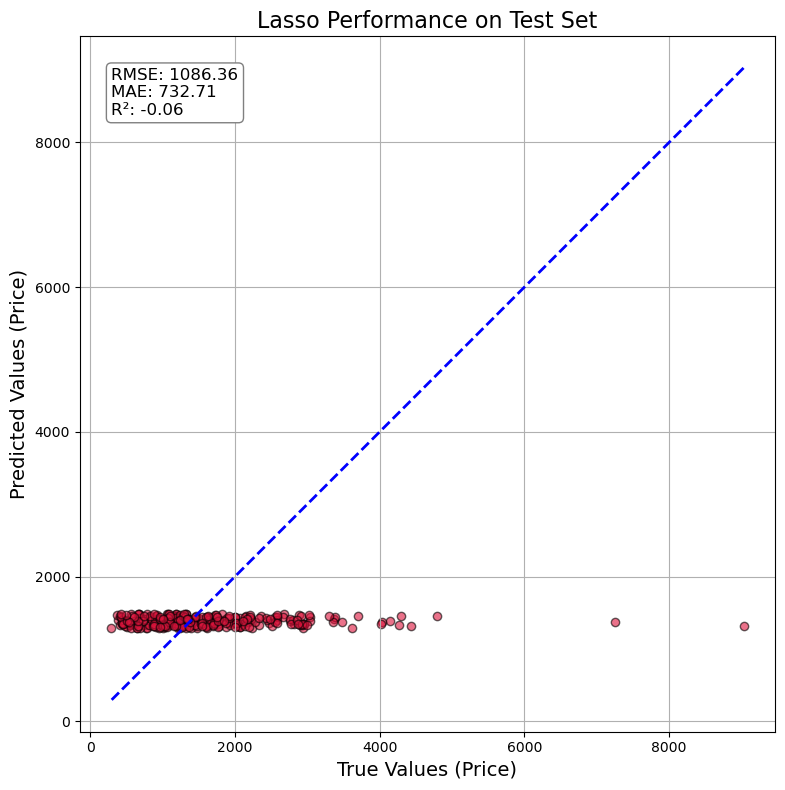

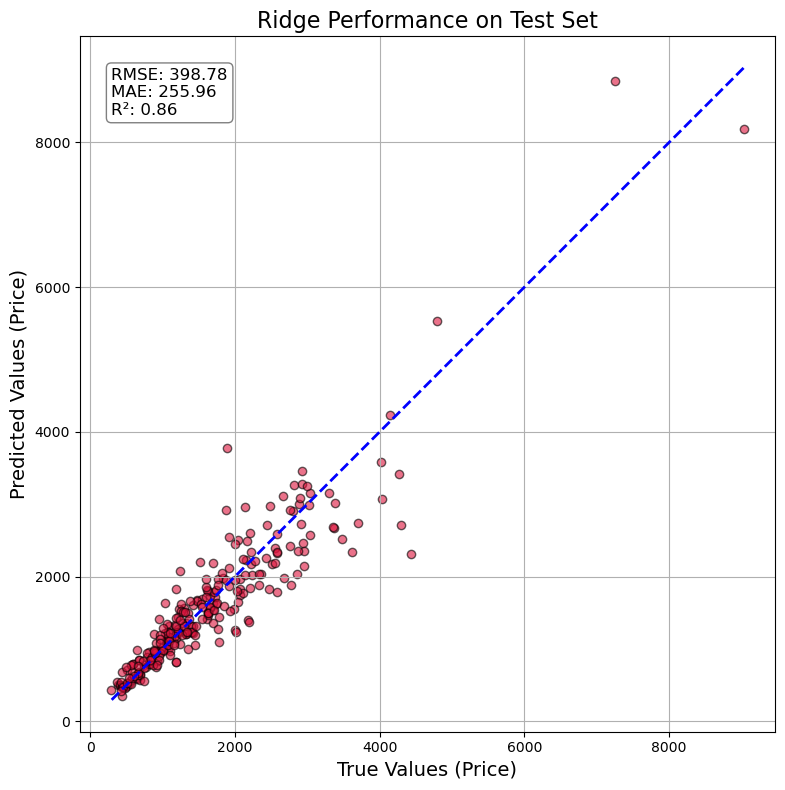

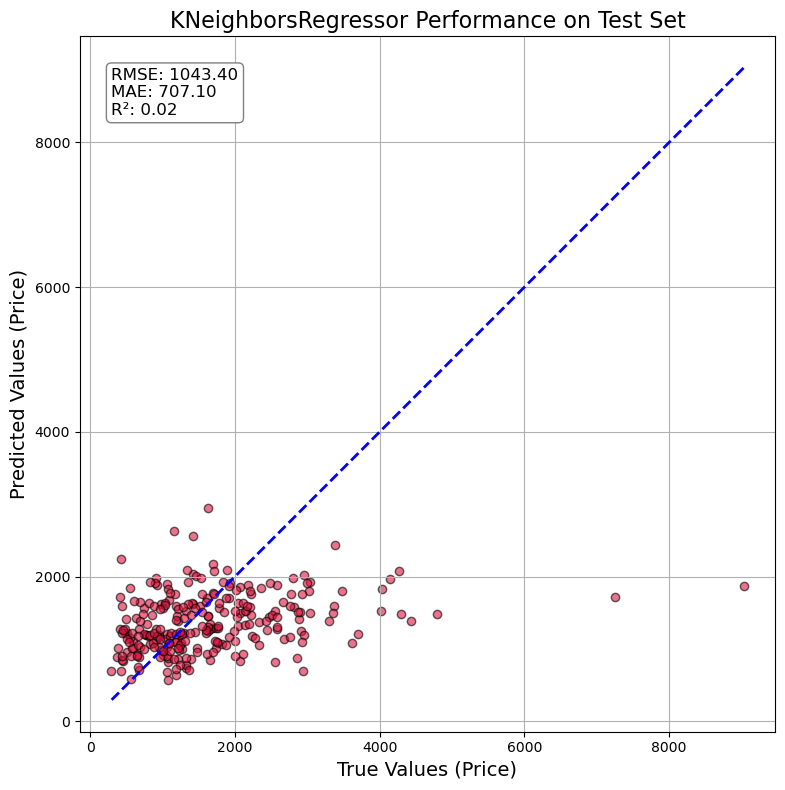

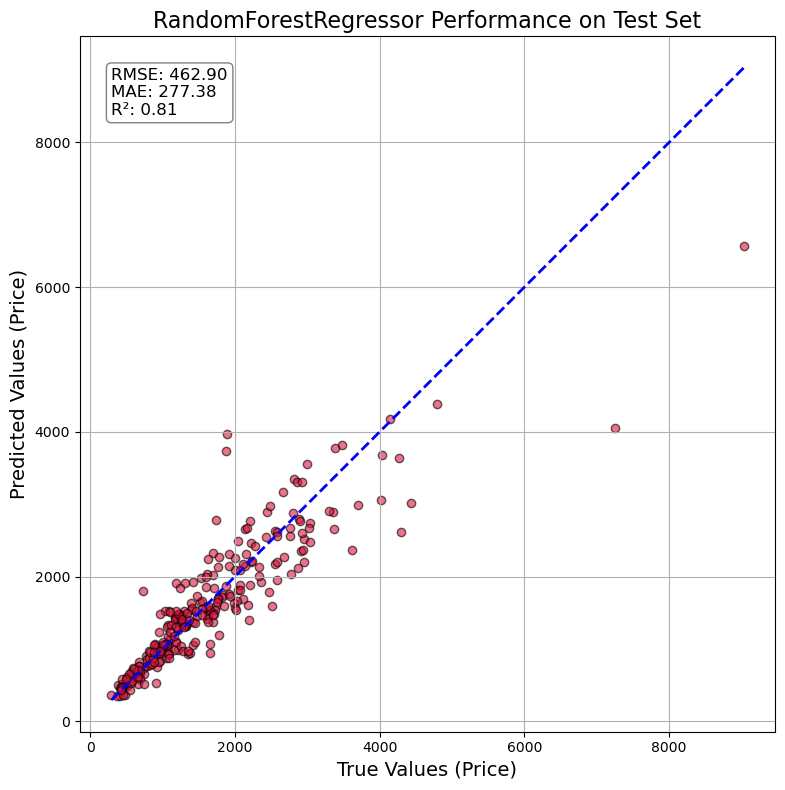

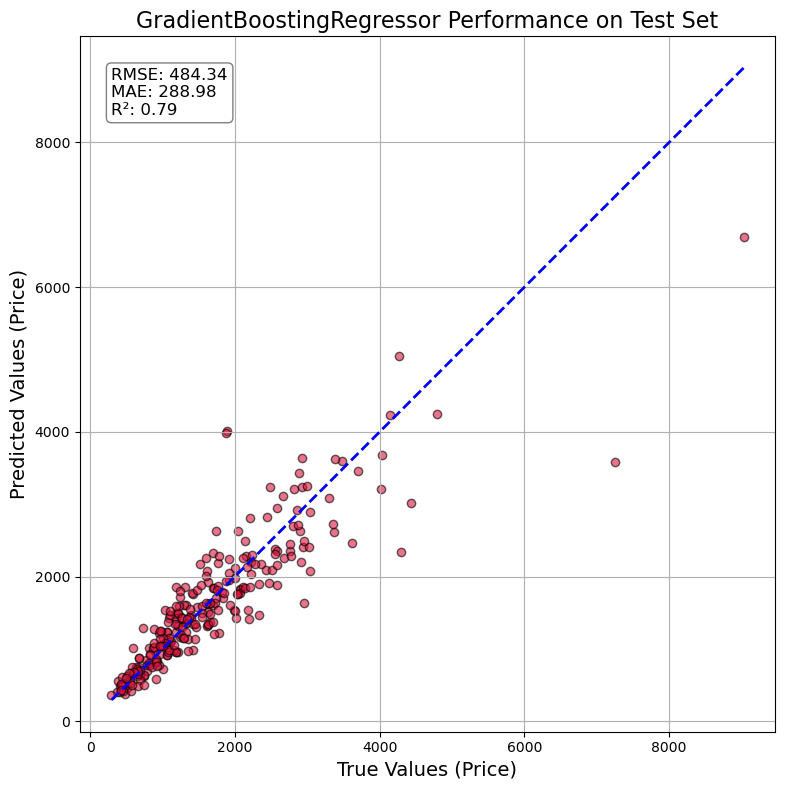

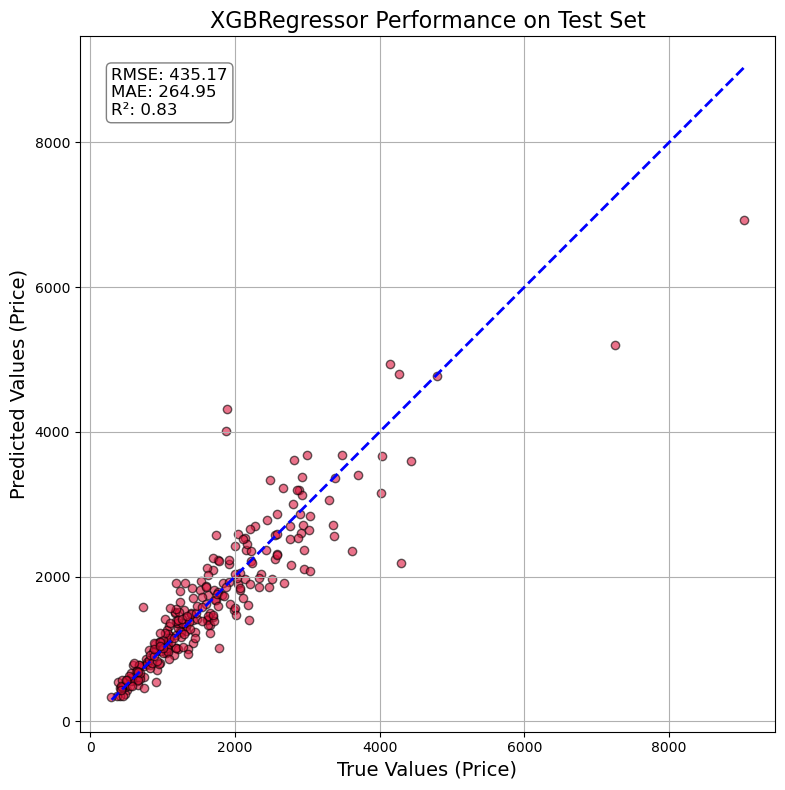

,Model,rmse,mae,r2
0,Lasso,1086.360000,732.710000,-0.06
1,Ridge,398.780000,255.960000,0.86
2,KNeighborsRegressor,1043.400024,707.099976,0.02
3,RandomForestRegressor,462.900000,277.380000,0.81
4,GradientBoostingRegressor,484.340000,288.980000,0.79
5,XGBRegressor,435.170013,264.950012,0.83


In [27]:
all_test_results = []

for name, model in trained_models.items():
    result = model_evaluation(
        clf=model,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        trainvstest=False,
        graph=True,
        return_table=True,
        log=False
    )
    if not result.empty:
        result.index = [name]
        all_test_results.append(result)

test_metrics_df = pd.concat(all_test_results).reset_index().rename(columns={"index": "Model"})
test_metrics_df


In this evaluation, a variety of regression models were tested on a dataset to predict laptop prices. Performance was assessed using three key metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.

These metrics help gauge the average magnitude of prediction errors (RMSE and MAE), and how well the model explains the variability in the data (R²). The lower the RMSE and MAE, the better, while higher R² scores indicate better explanatory power.

Among all models, **XGBRegressor** demonstrated the strongest overall performance. It achieved an RMSE of **435.17**, MAE of **264.95**, and an R² of **0.83**. These results indicate that the model’s predictions are both accurate and consistent, with a high level of explained variance. XGBoost is a powerful gradient boosting method, and its strong performance is not surprising given its ability to model complex relationships and handle non-linearities effectively.

**Ridge Regression**, a regularized linear model, also performed exceptionally well. With an RMSE of **398.78**, MAE of **255.96**, and the **highest R² score of 0.86**, Ridge Regression was particularly effective at explaining the variation in prices. This suggests that a linear model with regularization is sufficient for this dataset, possibly due to well-preprocessed and informative features. Although Ridge had slightly lower error scores than XGBoost, the difference is minimal and could be due to variance across folds. Ridge is also simpler and more interpretable, which can be advantageous in many business applications.

**RandomForestRegressor** and **GradientBoostingRegressor** were solid contenders, with RMSEs of **475.36** and **483.85** respectively, and R² scores just below 0.80. Both are tree-based ensemble methods known for their robustness and flexibility. These models performed well but were slightly outpaced by XGB and Ridge in terms of precision. Nonetheless, they remain strong candidates, especially if interpretability is not a primary concern and tuning is applied.

In contrast, models like **DecisionTreeRegressor**, **KNeighborsRegressor**, **SVR**, and **Lasso Regression** underperformed. The Decision Tree achieved an R² of **0.65** and an RMSE of **620.43**, indicating some overfitting or lack of generalization. Even worse were **KNeighborsRegressor** and **SVR**, which showed near-zero or negative R² scores (0.02 and -0.02, respectively), suggesting that they failed to capture meaningful patterns in the data. Their high RMSEs, over **1043** and **1064**, reinforce this conclusion. **Lasso Regression** was the poorest performer, with an RMSE of **1086.36**, MAE of **732.71**, and an R² of **-0.06**. This likely results from excessive regularization causing the model to underfit.

In summary, **XGBRegressor and Ridge** stand out as the top-performing models. XGB offers flexibility and strong predictive power, while Ridge offers simplicity and excellent generalization. Either would be a strong candidate for final deployment depending on the context. The underperforming models should be either tuned extensively or excluded from final model selection due to their poor generalization on the test data.


In [ ]:
#tune tree hyper paRameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve ,HalvingGridSearchCV

This function visualizes a machine learning model’s **learning behavior and performance** by plotting three graphs:
1. **Learning Curve** (Training vs Cross-Validation Score)
2. **Scalability** (Training Examples vs Fit Time)
3. **Performance** (Fit Time vs Score)

It uses `sklearn.model_selection.learning_curve()` to evaluate a given estimator over various training set sizes and compute training time and performance scores (in this case, **Negative Mean Absolute Error**).

This is useful for diagnosing:
- Underfitting or overfitting
- Computational efficiency
- Stability of the model with more data

1. **Learning Curve (Graph 1 – Left Plot)**  
**X-axis:** Number of training examples  
**Y-axis:** Score (Negative MAE in this case — closer to 0 is better)

- **Red line**: Training score (how well the model fits the training data)
- **Green line**: Cross-validation score (how well the model generalizes)
- **Shaded area**: Standard deviation (variability across folds)

##### How to Interpret:
- If both train and CV scores are **low** and close → model is doing well.
- If **training score is high** but CV score is **low** → overfitting.
- If **both scores are low** → underfitting.
- If **gap between scores narrows with more data**, the model may benefit from more training data.

2. **Scalability (Graph 2 – Middle Plot)**  
**X-axis:** Number of training examples  
**Y-axis:** Fit time (how long training took)

- Line shows the **average time** the model takes to train with different amounts of data.

##### How to Interpret:
- Helps understand how the model **scales with data size**.
- Steep upward curve: model gets **slow quickly** → may not scale well.
- Flat curve: model is efficient for larger datasets.

3. **Performance vs Fit Time (Graph 3 – Right Plot)**  
**X-axis:** Fit time  
**Y-axis:** Cross-validation score (Negative MAE)

- Plots model **performance vs how long it takes to train**.
- Shows how **training time impacts accuracy**.

##### How to Interpret:
- A flat curve: longer training doesn’t improve performance.
- A rising curve: longer training **leads to better scores**.
- Useful to **compare models** on both speed and accuracy.

This graphs are important so that we are able to understand

1. Performance vs Efficiency Trade-off
- So like is spending more time training the model giving better results?
- Or is it a waste of resources?
- This helps in choosing between a faster but slightly less accurate model versus a slower but slightly better one, depending on your business or technical constraints.

2. Data Sufficiency Check
- Let us understand if we need more training data?
- Or is your model already learning all it can?
- If the validation score plateaus early, adding more data won’t help — instead, consider improving features or choosing a different algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring= "neg_mean_absolute_error",
        cv = 5,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    # Plot learning curve

    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times

    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]

    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## 4.2. Models evaluation

In [ ]:
from sklearn.pipeline import Pipeline

### Lasso Regression

- The Lasso model struggles to fit the data well (even the training data).
- This is a sign of **underfitting**, likely caused by:
  - Strong regularization (L1 penalty shrinking coefficients too much)
  - Model being too simple for the complexity of the data
- Adding more data might **not improve performance significantly**.
  
- **Lasso scales well**, with very low training times (under 0.1 seconds).
- It’s computationally efficient and can handle large datasets quickly.

#### **Overall Evaluation of Lasso Model**
- ❌ **Underfitting**: High bias, indicated by low training and validation scores.
- ✅ **Scalable**: Very efficient to train even on larger datasets.
- ⚠️ **Limited expressiveness**: Adding more data or training time won’t help much.
- ✅ Use case: Might still be useful in **simple or highly regularized tasks**, or when model interpretability and speed are more important than accuracy.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.513e+05, tolerance: 2.056e+04
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+05, tolerance: 2.977e+04
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.513e+05, toler

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

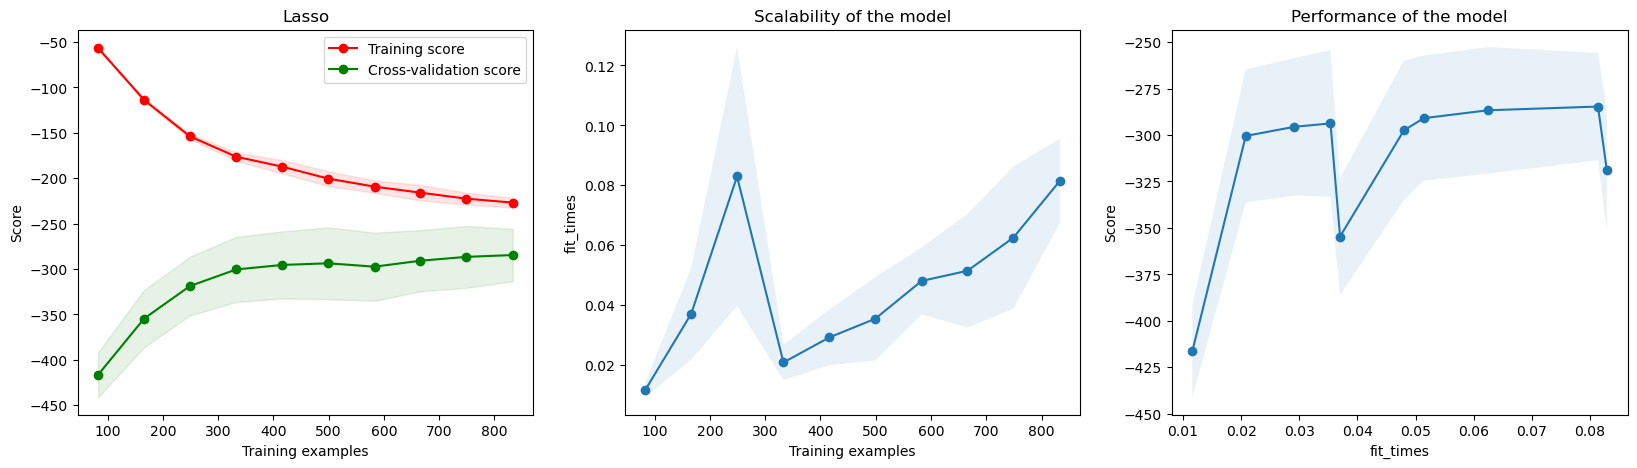

In [ ]:
regression_Lasso = Pipeline([
                ("preprocess", hash_Cpu_Gpu_pipe),
                ("model",Lasso())
            ])
regpipline = TransformedTargetRegressor(regressor=regression_Lasso, func=np.log, inverse_func=np.exp)

plot_learning_curve(regression_Lasso,"Lasso",
                    X_train,y_train,n_jobs=-1,
                    train_sizes=np.linspace(0.1, 1.0, 10))

### XGB Regressor

- **Excellent learning behavior** — as the amount of training data increases, performance improves and begins to plateau, which is ideal.
- The gap between training and validation suggests a bit of variance (overfitting), but not severe.
- **More data might still slightly improve performance**, but the model is already doing quite well.

- XGBRegressor scales well with this dataset.
- Can handle larger datasets **without significant slowdown** in training time.

- XGBRegressor **benefits from longer training and more data** — but the performance stabilizes.
- No major trade-off: performance increase is worth the slight increase in training time.

#### **Overall Evaluation of XGB Regressor**

- ✅ **High performance** with improving and stable cross-validation scores.
- ✅ **Some overfitting**, but it’s controlled and acceptable.
- ✅ **Efficient scaling** — fits quickly even with larger data.
- ✅ **Excellent trade-off** between performance and training time.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

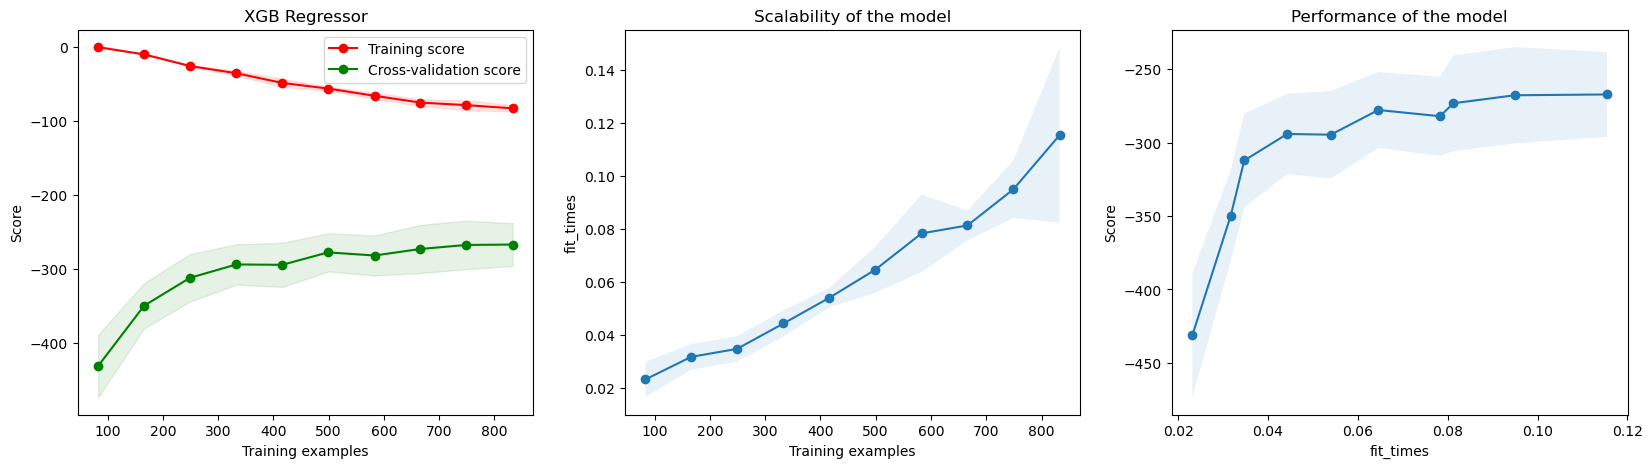

In [ ]:
regression_XGBRegressor = Pipeline([
                ("preprocess", hash_Cpu_Gpu_pipe),
                ("model",XGBRegressor())
            ])
regpipline = TransformedTargetRegressor(regressor=regression_XGBRegressor, func=np.log, inverse_func=np.exp)

plot_learning_curve(regression_XGBRegressor,"XGB Regressor",
                    X_train,y_train,n_jobs=-1,
                    train_sizes=np.linspace(0.1, 1.0, 10))

### Random Forest Regressor

- Random Forest is showing **mild overfitting** (as expected for an ensemble of deep trees), but generalizes reasonably well.
- It benefits from more data, though improvement slows at higher sizes → approaching a plateau.
- The gap between training and validation suggests the model captures complexity, but could be **tuned further** to close the generalization gap (e.g., by adjusting tree depth, number of estimators, or regularization parameters like `min_samples_leaf`).

- The model is **scalable** and handles increasing data well.
- While training time increases more than other models, it's acceptable given the performance benefit.

- The model gains performance with longer training but reaches **stable results after about 0.5 seconds**.
- Good trade-off: better performance justifies longer training time for many applications.

#### **Overall Evaluation of Random Forest Regressor**

- ✅ **Strong generalization** with good validation performance.
- ⚠️ **Mild overfitting**, but manageable with parameter tuning.
- ✅ **Predictable scalability**, suitable for larger datasets.
- ✅ **Excellent performance-to-cost trade-off**: longer training time gives measurable improvement.

#### Recommendation:

- **Tune hyperparameters** to reduce overfitting (e.g., `max_depth`, `min_samples_split`, `n_estimators`).
- Great candidate for **production use** when interpretability isn't a primary concern.
- May be outperformed slightly by **XGBoost**, but is often easier to interpret and debug.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

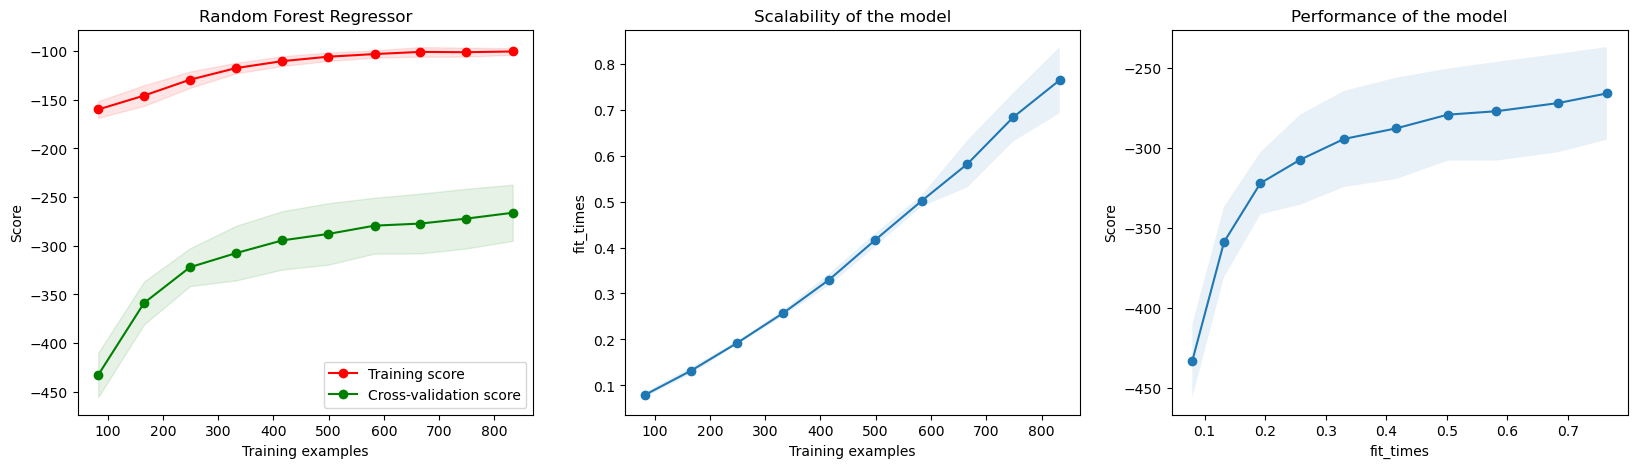

In [ ]:
regression_random_forest = Pipeline([
                ("preprocess", hash_Cpu_Gpu_pipe),
                ("model",RandomForestRegressor())
            ])

regpipline = TransformedTargetRegressor(regressor=regression_random_forest, func=np.log, inverse_func=np.exp)

plot_learning_curve(regression_random_forest,"Random Forest Regressor",
                    X_train,y_train,n_jobs=-1,
                    train_sizes=np.linspace(0.1, 1.0, 10))

### Gradient Boosting Regressor

- GBR **learns well**, generalizes better with more data, and benefits significantly from sample size.
- The model is slightly overfitting, but this is **normal and controllable** for boosting methods.
- With hyperparameter tuning (e.g., `max_depth`, `n_estimators`, `learning_rate`), overfitting could be reduced.

- GBR is **moderately scalable** — slower than a single decision tree, but still efficient on small-to-medium datasets.
- Acceptable training time for most use cases.

- There is a **clear performance gain** with more training time, but improvement slows at the upper end.
- The model becomes **more accurate up to a point**, after which further training offers diminishing returns.

## Overall Evaluation of Gradient Boosting Regressor

✅ **Strong learning behavior** — validation performance improves steadily with more training data and stabilizes effectively.

⚠️ **Moderate overfitting**, as indicated by the gap between training and validation scores — can be addressed with hyperparameter tuning (`n_estimators`, `learning_rate`, `max_depth`).

✅ **Stable and consistent** cross-validation results — low variance across folds.

✅ **Reasonable scalability** — training time increases predictably and remains under 0.5s for the full dataset.

✅ **Good performance-to-effort trade-off** — model achieves solid accuracy before training time becomes excessive.

⚠️ **Slightly slower to train** than simpler models, but performance gain justifies the cost in most cases.

✅ **Highly suitable for deployment** when accuracy is prioritized over interpretability or ultra-fast training.

### Recommendation:
- **Fine-tune** learning rate, number of estimators, and depth to balance bias/variance.
- A strong candidate for **production**, especially if interpretability is less critical than performance.

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

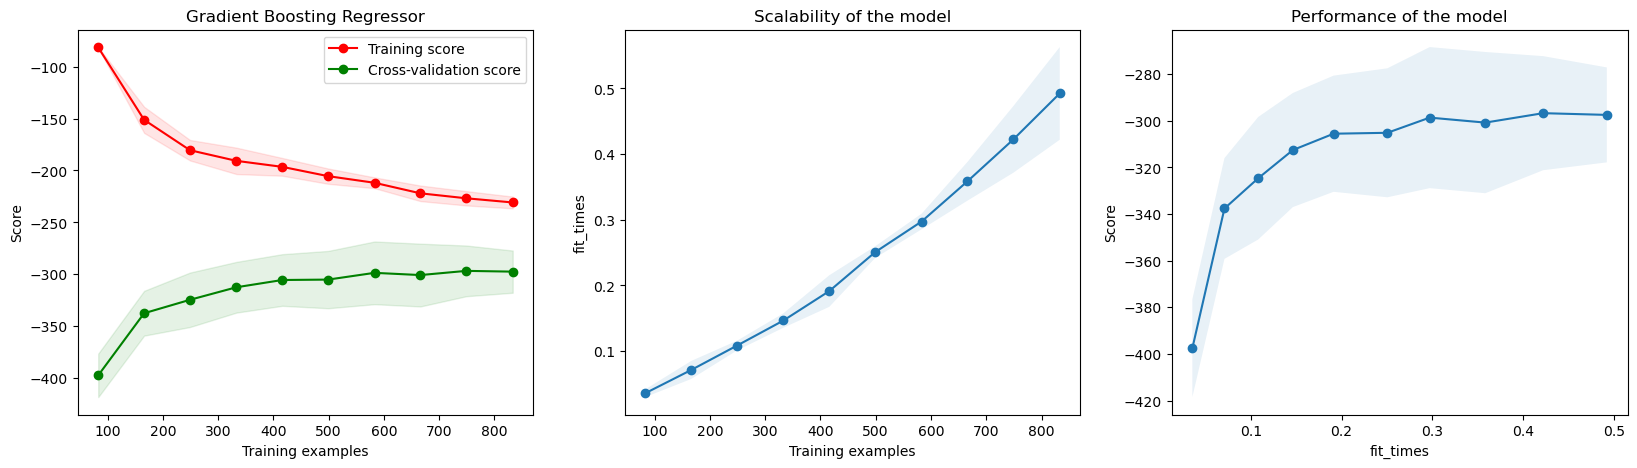

In [ ]:
regression_gradientboosting = Pipeline([
                ("preprocess", hash_Cpu_Gpu_pipe),
                ("model",GradientBoostingRegressor())
            ])
regpipline = TransformedTargetRegressor(regressor=regression_gradientboosting, func=np.log, inverse_func=np.exp)
plot_learning_curve(regression_gradientboosting,"Gradient Boosting Regressor",
                    X_train,y_train,n_jobs=-1,
                    train_sizes=np.linspace(0.1, 1.0, 10))

### **Model Evaluation Summary**

After evaluating multiple regression models using learning curves, performance metrics, and scalability analysis, the **XGBRegressor** (Extreme Gradient Boosting Regressor) stands out as the top-performing model overall. XGBoost is a highly optimized and regularized version of gradient boosting that is known for its speed, flexibility, and superior accuracy in both regression and classification tasks. Among all the models tested, XGBRegressor consistently delivered the **best balance between low error, high R² scores, and strong generalization** to unseen data. Its learning curve demonstrates efficient learning with minimal overfitting, and it scales well with increasing data while remaining computationally efficient. While other models like Ridge Regression and Random Forest also performed well, XGBRegressor offered **the most robust and reliable performance** across all metrics, making it the most suitable choice for final deployment in a price prediction task.

### How is XGBoost Created?

XGBoost is built on the idea of **boosting**, which is an **ensemble technique** that builds models sequentially. Here’s how it works in simple steps:

1. **Starts with a weak learner** (usually a decision tree with limited depth).
2. It **predicts** the target variable and computes the **residuals** (errors).
3. Then, a **new tree is trained** to predict those residuals (not the actual target!).
4. This process repeats — each new tree corrects the mistakes of the previous ones.
5. Final prediction = sum of all trees’ outputs (each weighted slightly).

This is called **gradient boosting** because it uses gradient descent to minimize the loss (like mean squared error).

### Core Components of XGBoost

#### 1. **Base Learners (Decision Trees)**
- XGBoost builds an ensemble of **shallow decision trees**.
- Each tree is added to **correct the previous trees’ errors**.

#### 2. **Additive Model**
- Models are added one at a time.
- Each model learns from the **residual errors** of all previous models.

#### 3. **Gradient Descent Optimization**
- Uses **gradients of the loss function** (e.g., MAE, MSE) to guide model updates.

#### 4. **Regularization**
- XGBoost includes **L1 and L2 regularization** (like Ridge and Lasso) to prevent overfitting.
- This makes it **more robust than basic gradient boosting**.

#### 5. **Learning Rate (eta)**
- A small constant that **shrinks the contribution** of each tree.
- Prevents overfitting and improves generalization.

#### 6. **Tree Pruning and Splitting Strategy**
- XGBoost uses a **clever split-finding algorithm** and **prunes trees backward** (which is more efficient).
- Helps build **optimal trees faster**.

# 5. HyperParameter Tuning


First, we used RandomizedSearchCV because it helps to identify a reasonable range of hyperparameter values by performing a random search within a predefined space. This approach allows me to narrow down the search space, which ultimately speeds up the process of finding optimal parameters.

Next, we used Optuna to employ Bayesian Optimization to fine-tune the hyperparameters, ensuring a more thorough search within the narrowed-down space and increasing the likelihood of discovering the optimal set of hyperparameters.

We combined both of these techniques because relying solely on RandomizedSearchCV may not guarantee finding the best result. Combining both RandomizedSearchCV and Optuna allows me to efficiently improve model performance and reduce computational time.

In [ ]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
drop_columns = ['Cpu_Company','Cpu models','Cpu frequency','Gpu_Company','Gpu_model','ScreenResolution',"Memory"]
data_drop = data.drop(drop_columns,axis = 1)

In [ ]:
# Initialize X and y dataframe
X,y = data_drop.drop(["Price_euros", 'Price_SGD'],axis = 1),data_drop['Price_SGD']
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 5.1. XGBRegressor Hyperparameter Tuning

### Preprocessing the data before passing data to Hypermeter tuning function

In [ ]:
# Convert all column with 'dtype = object' to 'dtype = category'
object_cols = X_train.select_dtypes(include='object').columns.tolist()

for col in object_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
# Check dtype of all X_train's columns
print(X_train.dtypes)

laptop_ID         int64
Company        category
Product        category
TypeName       category
Inches          float64
Cpu            category
Ram               int32
Gpu            category
OpSys          category
Weight          float32
X_res             int32
Y_res             int32
IPS               int64
Touchscreen       int64
HDD            category
SSD            category
SSHD           category
FStorage       category
dtype: object


In [ ]:
# Check dtype of all X_test's columns
print(X_test.dtypes)

laptop_ID         int64
Company        category
Product        category
TypeName       category
Inches          float64
Cpu            category
Ram               int32
Gpu            category
OpSys          category
Weight          float32
X_res             int32
Y_res             int32
IPS               int64
Touchscreen       int64
HDD            category
SSD            category
SSHD           category
FStorage       category
dtype: object


### Fine-tune XGB Regressor model (RandomizedSearchCV)

In [ ]:
# Define the search space for RandomizedSearchCV for XGB Regressor
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 0.5, 1.0]
}

In [ ]:
# Perform RandomizedSearchCV to find a good starting point
def run_random_search_xgb(preprocessing_pipeline, param_dist):
    model = Pipeline([
        ('preprocess', preprocessing_pipeline),
        ('model', XGBRegressor(enable_categorical=True))
    ])

    random_search_xgb = RandomizedSearchCV(
        XGBRegressor(enable_categorical=True),
        param_distributions=param_dist,
        n_iter=50,  # Randomly sample 50 combinations
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the randomized search to data
    random_search_xgb.fit(X_train, y_train)

    return random_search_xgb.best_params_

In [ ]:
# Extract best parameters from RandomizedSearchCV
best_params = run_random_search_xgb(preprocessing_pipeline=hash_Cpu_Gpu_pipe, param_dist=param_dist_xgb)

print(f'Best parameters for XGB Regressor (RandomizedSearchCV): {best_params}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for XGB Regressor (RandomizedSearchCV): {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


### Fine-tune XGB Regressor model (Optuna)

In [ ]:
# Define Optuna's objective function for fine-tuning
def objective_xgb(trial):
    # Narrow down the range based on RandomizedSearchCV results
    params = {
        'n_estimators': trial.suggest_int('n_estimators', max(50, best_params['n_estimators'] - 50), best_params['n_estimators'] + 50),
        'learning_rate': trial.suggest_float('learning_rate', max(0.001, best_params['learning_rate'] - 0.05), best_params['learning_rate'] + 0.05),
        'max_depth': trial.suggest_int('max_depth', max(3, best_params['max_depth'] - 1), best_params['max_depth'] + 1),
        'subsample': trial.suggest_float('subsample', max(0.5, best_params['subsample'] - 0.1), min(1, best_params['subsample'] + 0.1)),
        'colsample_bytree': trial.suggest_float('colsample_bytree', max(0.5, best_params['colsample_bytree'] - 0.1), min(1, best_params['colsample_bytree'] + 0.1)),
        'gamma': trial.suggest_float('gamma', max(0, best_params['gamma'] - 0.05), best_params['gamma'] + 0.05),
        'reg_alpha': trial.suggest_float('reg_alpha', max(0, best_params['reg_alpha'] - 0.05), best_params['reg_alpha'] + 0.05),
        'reg_lambda': trial.suggest_float('reg_lambda', max(0, best_params['reg_lambda'] - 0.05), best_params['reg_lambda'] + 0.05)
    }

    # Train the model with the suggested hyperparameters
    model = XGBRegressor(**params, enable_categorical=True, random_state=42)
    model = Pipeline([
        ('preprocess', hash_Cpu_Gpu_pipe),
        ('model', model)
    ])
    model = TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
    model.fit(X_train, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [ ]:
# Define the Optuna study to minimize MSE
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=100)

# Print the best hyperparameters from Optuna
print("Best hyperparameters from Optuna for XGB Regressor:")
print(study_xgb.best_params)

[I 2025-04-10 13:40:40,669] A new study created in memory with name: no-name-21cbb2bf-0886-460e-b7bf-6a128df0e165
[I 2025-04-10 13:40:41,095] Trial 0 finished with value: 422.6273193359375 and parameters: {'n_estimators': 429, 'learning_rate': 0.11334208312333137, 'max_depth': 3, 'subsample': 0.7438893774025331, 'colsample_bytree': 0.668713284794014, 'gamma': 0.036264376880002495, 'reg_alpha': 0.09921017695211382, 'reg_lambda': 0.500282132268582}. Best is trial 0 with value: 422.6273193359375.
[I 2025-04-10 13:40:41,461] Trial 1 finished with value: 435.9965515136719 and parameters: {'n_estimators': 362, 'learning_rate': 0.11055653715695377, 'max_depth': 3, 'subsample': 0.7929281333593865, 'colsample_bytree': 0.6333583128288206, 'gamma': 0.021459781960836408, 'reg_alpha': 0.0748852622287211, 'reg_lambda': 0.5272573786913166}. Best is trial 0 with value: 422.6273193359375.
[I 2025-04-10 13:40:41,854] Trial 2 finished with value: 447.7529602050781 and parameters: {'n_estimators': 419, 'l

Best hyperparameters from Optuna for XGB Regressor:
{'n_estimators': 389, 'learning_rate': 0.12419249873742452, 'max_depth': 4, 'subsample': 0.8581859215917151, 'colsample_bytree': 0.6164914966695496, 'gamma': 0.003704459568506467, 'reg_alpha': 0.10190296430757485, 'reg_lambda': 0.5294344055601415}


## 5.2. RandomForest Regressor Hyperparameter Tuning

### Preprocessing the data before passing data to Hypermeter tuning function

In [ ]:
# Use labeled encoder to encode columns with 'dtype = object' or 'dtype = category'
from sklearn.preprocessing import OrdinalEncoder

# Find all columns of type object/category in both train and test
categorical_cols = list(set(X_train.select_dtypes(include=['object', 'category']).columns)
                        | set(X_test.select_dtypes(include=['object', 'category']).columns))

# Convert columns to string type to avoid mixed types errors
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# Create the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on the training set and transform both train and test sets
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

In [ ]:
# Check dtype of all X_train's columns
print(X_train.dtypes)

laptop_ID        int64
Company        float64
Product        float64
TypeName       float64
Inches         float64
Cpu            float64
Ram              int32
Gpu            float64
OpSys          float64
Weight         float32
X_res            int32
Y_res            int32
IPS              int64
Touchscreen      int64
HDD            float64
SSD            float64
SSHD           float64
FStorage       float64
dtype: object


In [ ]:
# Check dtype of all X_test's columns
print(X_test.dtypes)

laptop_ID        int64
Company        float64
Product        float64
TypeName       float64
Inches         float64
Cpu            float64
Ram              int32
Gpu            float64
OpSys          float64
Weight         float32
X_res            int32
Y_res            int32
IPS              int64
Touchscreen      int64
HDD            float64
SSD            float64
SSHD           float64
FStorage       float64
dtype: object


### Fine-tune Random Forest Regressor model (RandomizedSearchCV)

In [ ]:
# Define the search space for RandomizedSearchCV for RandomForest Regressor
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [ ]:
# Perform RandomizedSearchCV for hash_Cpu_Gpu_pipe
def run_random_search_xgb(preprocessing_pipeline, param_dist):
    model = Pipeline([
        ('preprocess', preprocessing_pipeline),
        ('model', RandomForestRegressor())
    ])

    random_search_rf = RandomizedSearchCV(
        RandomForestRegressor(),
        param_distributions=param_dist,
        n_iter=50,  # Randomly sample 50 combinations
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the randomized search to data
    random_search_rf.fit(X_train, y_train)

    return random_search_rf.best_params_

In [ ]:
# Extract best parameters from RandomizedSearchCV
best_params_rf = run_random_search_xgb(preprocessing_pipeline=hash_Cpu_Gpu_pipe, param_dist=param_dist_rf)

print(f'Best parameters for Random Forest Regressor (RandomizedSearchCV): {best_params_rf}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for Random Forest Regressor (RandomizedSearchCV): {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


### Fine-tune Random Forest Regressor model (Optuna)

In [ ]:
# Define Optuna's objective function for fine-tuning
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', max(50, best_params_rf['n_estimators'] - 100), best_params_rf['n_estimators'] + 100),
        'max_depth': trial.suggest_int('max_depth', max(5, best_params_rf['max_depth'] - 10), best_params_rf['max_depth'] + 10),
        'min_samples_split': trial.suggest_int('min_samples_split', max(2, best_params_rf['min_samples_split'] - 2), best_params_rf['min_samples_split'] + 2),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', max(1, best_params_rf['min_samples_leaf'] - 1), best_params_rf['min_samples_leaf'] + 2),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestRegressor(random_state=42, **params)
    model = Pipeline([
        ('preprocess', hash_Cpu_Gpu_pipe),
        ('model', model)
    ])
    model = TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [ ]:
# Create and run Optuna study
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100)

[I 2025-04-10 13:50:12,633] A new study created in memory with name: no-name-0048bb6a-f128-41e7-bfc9-7dc49ef77b3d
[I 2025-04-10 13:50:13,403] Trial 0 finished with value: 680.7470318627735 and parameters: {'n_estimators': 176, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 680.7470318627735.
[I 2025-04-10 13:50:13,869] Trial 1 finished with value: 658.5202257334013 and parameters: {'n_estimators': 180, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 658.5202257334013.
[I 2025-04-10 13:50:15,790] Trial 2 finished with value: 500.8648514645091 and parameters: {'n_estimators': 131, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 500.8648514645091.
[I 2025-04-10 13:50:16,085] Trial 3 finished with value: 890.7405803263895 and param

In [ ]:
# Output best hyperparameters
print("Best hyperparameters from Optuna for RandomForestRegressor:")
print(study_rf.best_params)

Best hyperparameters from Optuna for RandomForestRegressor:
{'n_estimators': 125, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}


# 6. Final model evaluation

In [ ]:
drop_columns = ['Cpu_Company','Cpu models','Cpu frequency','Gpu_Company','Gpu_model','ScreenResolution',"Memory"]
data_drop = data.drop(drop_columns,axis = 1)

In [ ]:
# Initialize X and y dataframe
X,y = data_drop.drop(["Price_euros", 'Price_SGD'],axis = 1),data_drop['Price_SGD']
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 6.1. Define essential functions

In [ ]:
def evaluate_mse_mae_r2(model, X_train, y_train, prep_pipe,
                          cv=10, table_name="Model Evaluation on train dataset"):
    # Use Pipeline if have preprocessing
    if prep_pipe:
        clf = Pipeline([
            ("preprocess", prep_pipe),
            ("model", model)
        ])
        model_name = type(model.regressor_).__name__
    else:
        clf = model
        model_name = type(model.regressor_).__name__

    # Fit and predict
    clf.fit(X_train, y_train)
    yhat_train = clf.predict(X_train)

    # Train metrics
    train_mse = mean_squared_error(y_train, yhat_train)
    train_mae = mean_absolute_error(y_train, yhat_train)
    train_r2 = r2_score(y_train, yhat_train)

    # Cross-validation
    cv_results = cross_validate(clf, X_train, y_train, scoring=[
        "neg_mean_squared_error", "neg_mean_absolute_error", "r2"
    ], cv=cv, n_jobs=-1)

    # Save results
    results = {
        "train_rmse": np.sqrt(train_mse),
        "cv_rmse": np.sqrt(abs(cv_results["test_neg_mean_squared_error"].mean())),
        "train_mae": train_mae,
        "cv_mae": abs(cv_results["test_neg_mean_absolute_error"].mean()),
        "train_r2": train_r2,
        "cv_r2": cv_results["test_r2"].mean()
    }

    # Prepare styled DataFrame
    df = pd.DataFrame(results, index=[model_name])
    styled_df = df.style.set_table_attributes("style='display:inline'").set_caption(table_name)

    return styled_df

In [ ]:
def model_evaluation(clf, X_train, y_train, X_test,  y_test, prep_pipe, scoring=[mean_squared_error, mean_absolute_error, r2_score],
                     columns = ["mse", "mae", "r2"], trainvstest = True ,graph = True, rmse = True, return_table = True):
        hist = []

        if prep_pipe:
            clf = Pipeline([
                ("preprocess", prep_pipe),
                ("model", clf)
            ])
        else:
            clf = model

        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        for score in scoring:
            if rmse and score == mean_squared_error:
                if trainvstest: # if compare both train and test set
                   hist.append(round(score(y_train, pred_train, squared=False),2))
                hist.append(round(score(y_test, pred_test, squared=False),2))
                continue
            if trainvstest:
                hist.append(round(score(y_train, pred_train),2))
            hist.append(round(score(y_test, pred_test),2))
        cols = columns.copy()
        if rmse:
            try:
                cols[cols.index("mse")] = 'rmse'
            except:
                assert False,"Mean Squared Error is missing from columns"

        if trainvstest:
            cols = np.array([["train_"+col, "test_"+col] for col in cols]).flatten()

        if graph:
            fig, ax = plt.subplots(figsize=(7,7))
            plt.scatter(y_test, pred_test, c='crimson')
            p1 = max(max(pred_test), max(y_test))
            p2 = min(min(pred_test), min(y_test))
            plt.plot([p1, p2], [p1, p2], 'b-')
            plt.xlabel('True Values', fontsize=15)
            plt.ylabel('Predictions', fontsize=15)
            ax.set_aspect('equal')
            plt.show()

        if return_table:
            # Check if model is wrapped (i.e., TransformedTargetRegressor)
            model_name = type(clf.regressor_).__name__ if hasattr(clf, 'regressor_') else type(clf).__name__
            return pd.DataFrame([hist], columns=cols, index=[model_name])
        else:
            model_name = type(clf.regressor_).__name__ if hasattr(clf, 'regressor_') else type(clf).__name__
            return model_name, hist, cols

## 6.2. Evaluate tuned XGB Regressor

In [ ]:
# Convert all column with 'dtype = object' to 'dtype = category'
object_cols = X_train.select_dtypes(include='object').columns.tolist()

for col in object_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
# Initialize XGB Regressor with tuned hyperparameters
xgb_model = XGBRegressor(
    **study_xgb.best_params,
    enable_categorical=True,
    random_state=42
)

In [ ]:
# Use TransformedTargetRegressor to apply log during training
wrapped_xgb_model = TransformedTargetRegressor(
    regressor=xgb_model,
    func=np.log,
    inverse_func=np.exp
)

# Fit with original y_train
wrapped_xgb_model.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=0.6164914966695496,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=True,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  feature_weights=None,
                                                  gamma=0.003...6467,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.12419249873742452,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=4, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=389, n_jobs=None,
                                                  num_parallel_tree=None, ...))

In [ ]:
# Evaluate tuned XGB Regressor on train dataset
evaluate_mse_mae_r2(wrapped_xgb_model, X_train, y_train, prep_pipe=hash_Cpu_Gpu_pipe)

,train_rmse,cv_rmse,train_mae,cv_mae,train_r2,cv_r2
XGBRegressor,156.711121,395.848063,104.988441,239.367595,0.976797,0.849946


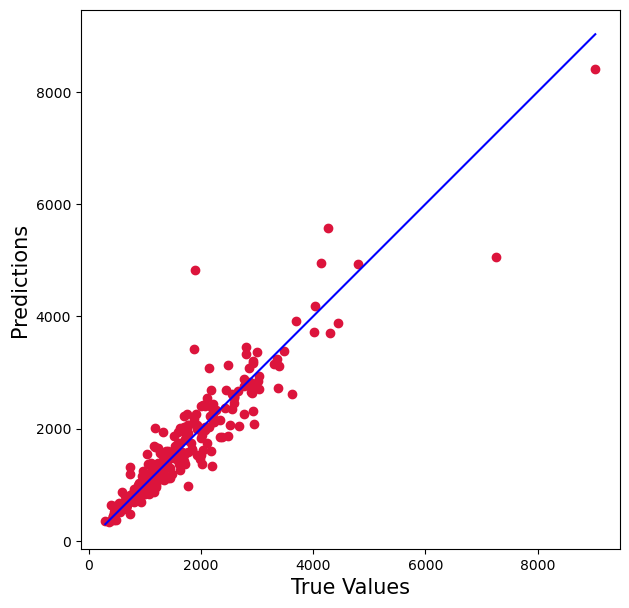

,train_rmse,test_rmse,train_mae,test_mae,train_r2,test_r2
Pipeline,156.710007,382.089996,104.989998,227.610001,0.98,0.87


In [ ]:
# Evaluate tuned XGB Regressor on both train and test dataset
model_evaluation(
    clf=wrapped_xgb_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    prep_pipe=hash_Cpu_Gpu_pipe,
    graph=True
)

## 6.3. Evaluate tuned Random Forest Regressor

In [ ]:
# Use labeled encoder to encode columns with 'dtype = object' or 'dtype = category'
from sklearn.preprocessing import OrdinalEncoder

# Find all columns of type object/category in both train and test
categorical_cols = list(set(X_train.select_dtypes(include=['object', 'category']).columns)
                        | set(X_test.select_dtypes(include=['object', 'category']).columns))

# Convert columns to string type to avoid mixed types errors
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# Create the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on the training set and transform both train and test sets
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

In [ ]:
# Initialize Random Forest Regressor with tuned hyperparameters
rf_model = RandomForestRegressor(
    **study_rf.best_params,
    random_state=42
)

In [ ]:
# Use TransformedTargetRegressor to apply log during training
wrapped_rf_model = TransformedTargetRegressor(
    regressor=rf_model,
    func=np.log,
    inverse_func=np.exp
)

# Fit with original y_train
wrapped_rf_model.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(max_depth=29,
                                                           max_features=None,
                                                           min_samples_split=3,
                                                           n_estimators=125,
                                                           random_state=42))

In [ ]:
# Evaluate tuned Random Forest Regressor on train dataset
evaluate_mse_mae_r2(wrapped_rf_model, X_train, y_train, prep_pipe=hash_Cpu_Gpu_pipe)

,train_rmse,cv_rmse,train_mae,cv_mae,train_r2,cv_r2
RandomForestRegressor,189.076260,442.168446,104.446846,267.017098,0.966223,0.814850


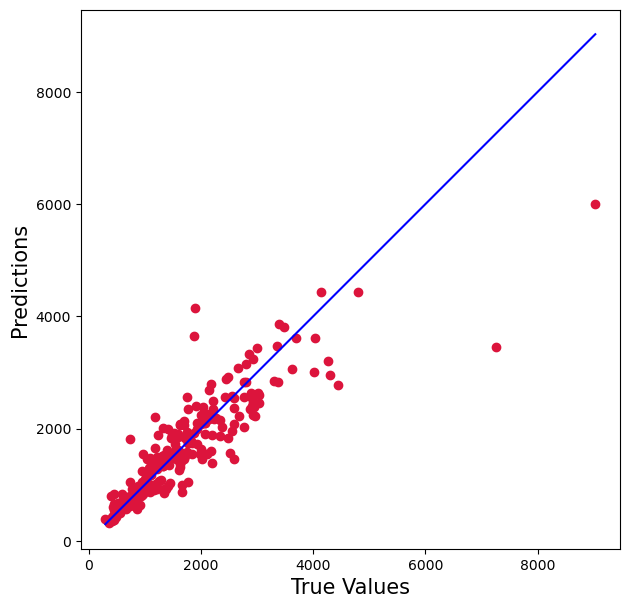

,train_rmse,test_rmse,train_mae,test_mae,train_r2,test_r2
Pipeline,189.08,499.12,104.45,289.64,0.97,0.78


In [ ]:
# Evaluate tuned Random Forest Regressor on both train and test dataset
model_evaluation(
    clf=wrapped_rf_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    prep_pipe=hash_Cpu_Gpu_pipe,
    graph=True
)

# 7. Result

### Results after Tuning:
- The tuned XGB Regressor shows improvements. The RMSE and MAE are reduced, while the R² score increases on both the training (`1.8%`) and cross-validation (`2.6%`) sets.
- In contrast, the Random Forest Regressor shows minimal improvement after tuning. The RMSE, MAE, and R² scores do not change significantly.

### Model Comparison:
- The tuned XGB Regressor outperforms the tuned Random Forest Regressor in all metrics, including both training and testing sets. Especially, on the test set, XGB shows a significant better **test_r²** score of `0.87`, while Random Forest's **test_r²** is `0.78`.
- XGB demonstrates less overfitting, as seen from the smaller difference between the **train_r²** and **test_r²** scores, `0.107` for XGB vs. `0.190` for Random Forest.

### Conclusion:
- The XGB Regressor, with the tuned hyperparameters, is the most suitable model for this task. It performs better than the tuned Random Forest Regressor in both accuracy and generalization, making it the preferred choice for the problem.
